<a href="https://colab.research.google.com/github/omartinez182/VMLS/blob/main/Python_Companion/VMLS_Python%2C_Ch_04_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

# 4.1,2 Clustering & A Clustering Objective

1. "The goal of clustering is to group or partition vectors into k groups or clusters, with the vectors in each group close to each other"
2. Objective: A single value used to judge "choice of clustering": choose k

In [20]:
#given a tuple of vectors, and representatives for groups of vectors,
#what is the average distance each vector has from a representative

x = np.array([[0,1],[1,0],[-1,1]])
reps = np.array([[1,1],[0,0]])

jclust = lambda x, reps, assignment: np.average([npl.norm(x[i] - reps[assignment[i]])**2 for i in range(len(x))])
jclust(x,reps,[0,1,0]), jclust(x,reps,[0,0,1]) #assignments are 0 indexed

#How can we select the center-most (most minimal distance between vectors) representative?

(2.0, 1.3333333333333333)

In [30]:
test_list = [1,2,3]
test_list.index(3)

2

# 4.3 k-Means Algorithm

"Iterating between choosing group representatives and choosing group assignments"

#### Pseudocode:
1. Initialize a group of representatives either by: 1) randomly selecting from set of vectors, or 2) randomly group vectors and create mean vectors to be used as representatives.
2. Partition vectors in k amount of groups. Assign a group for every vector associated with the nearest representative.
    If there are any ties for vector assignments, choose the group with the smallest j value of the ties.
    If there is an empty group, remove from list of k groups.
    If there are two iterations without changes in vector assignments, stop algorithm.
3. Update representatives. For every group from 1-k set the corresponding representative to be the mean of the vectors in that group.
    If Jclust gets small, stop algorithm.

In [32]:
def kmeans(x,k,maxiters = 100, tolerance = 1e-4):
    
    N = len(x) #amount of vectors
    n = len(x[0]) #dimension of each vector
    distances = np.zeros(N) #stores distances of each pt to nearest rep
    progress = [] #used to visualize J updates
    jPrev = np.Infinity #placeholder for ending condition: 
                        #if previous J and current J haven't changed much,finish
    
    reps = [np.zeros(n) for j in range(k)] #stores representatives
    assignment = [np.random.randint(k) for i in range(N)] #intializes a random assignment of N integers between 0 and k
    
    for itr in range(maxiters):
        # Calculate the representatives for each group
        for j in range(k):
            group = [i for i in range(N) if assignment[i] == j]
            reps[j] = sum(x[group]/len(group))
        for i in range(N):
            # Calculate the distance between each vector (x_i) and all of the representatives (j) and select the min value
            distances[i] = np.amin([npl.norm(x[i] - reps[j]) for j in range(k)])
            # Based on the index of the min mean squared distance of each vector (x_i) for all representatives (j) assign a cluster to each vector (x_i)
            assignment[i] = [npl.norm(x[i] - reps[j]) for j in range(k)].index(np.amin([npl.norm(x[i] - reps[j]) for j in range(k)]))
        J = (npl.norm(distances)**2) / N
        progress.append([J,itr])
        print("Iteration " + str(itr) + ": Jclust = " + str(J)+".")
        if (itr > 1) and (abs(J-jPrev) < (tolerance * J)):
            return assignment, reps, progress
        
        jPrev = J  
    return assignment, reps, progress

In [42]:
# Generate a "random" data
X = np.concatenate(
    [[.3*np.random.randn(2) for i in range(100)],
     [np.array([1,1]) + .3*np.random.randn(2) for i in range(100)],
     [np.array([1,-1]) + .3*np.random.randn(2) for i in range(100)]]
)

((-1.5, 2.5), (-2.0, 2.0))

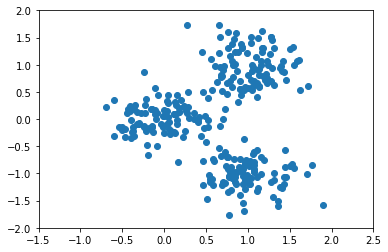

In [45]:
# Visualize the data
plt.scatter([x[0] for x in X],[x[1] for x in X])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

#### Testing the K-means Algorithm

In [47]:
k=2
assignment, reps, progress = kmeans(X,k)

Iteration 0: Jclust = 0.9791952927820053.
Iteration 1: Jclust = 0.5360231912965364.
Iteration 2: Jclust = 0.5360065157746859.


((-1.5, 2.5), (-2.0, 2.0))

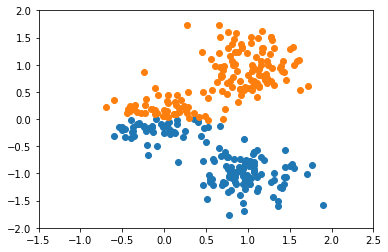

In [48]:
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

Iteration 0: Jclust = 0.9777014275910174.
Iteration 1: Jclust = 0.1837016922276196.
Iteration 2: Jclust = 0.17516509135849714.
Iteration 3: Jclust = 0.17485694396829637.
Iteration 4: Jclust = 0.17485694396829637.


((-1.5, 2.5), (-2.0, 2.0))

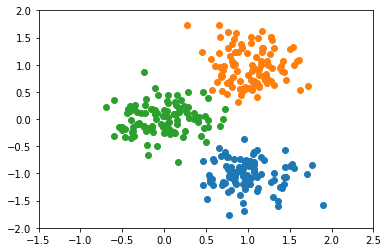

In [49]:
k=3
assignment, reps, progress = kmeans(X,k)
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

Iteration 0: Jclust = 0.8568892375705291.
Iteration 1: Jclust = 0.17792972502666035.
Iteration 2: Jclust = 0.15404796502891982.
Iteration 3: Jclust = 0.15235299896328341.
Iteration 4: Jclust = 0.15115834369345119.
Iteration 5: Jclust = 0.15050089594176536.
Iteration 6: Jclust = 0.14966696938301025.
Iteration 7: Jclust = 0.14955728502638532.
Iteration 8: Jclust = 0.14953641399238565.
Iteration 9: Jclust = 0.14943748001529386.
Iteration 10: Jclust = 0.1492926211515291.
Iteration 11: Jclust = 0.1491249750921921.
Iteration 12: Jclust = 0.1491249750921921.


((-1.5, 2.5), (-2.0, 2.0))

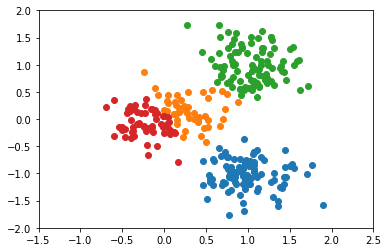

In [50]:
k=4
assignment, reps, progress = kmeans(X,k)
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]])
plt.scatter([c[0] for c in groups[3]],[c[1] for c in groups[3]])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])
# plt.show()
# plt.scatter([i[1] for i in progress],[i[0] for i in progress])
# plt.show()

# 4.4 Examples

# 4.5 Applications